#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

## # Import Required Libraries:

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load the feature store dataset as dataframe

file_path = r"wafer_23012020_041211.csv"
wafers = pd.read_csv(file_path)
print("Shape of the feature store dataset: ", wafers.shape)
wafers.head()

Shape of the feature store dataset:  (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
#wafers.drop(columns= ["Unnamed: 0", 'Good/Bad']).iloc[:100].to_csv("test.csv", index=False)

In [4]:
#replace the column unnamed: 0 as wafer
wafers.rename(columns={"Unnamed: 0": "Wafer"}, inplace=True)

In [5]:
## Train-Test Split

from sklearn.model_selection import train_test_split

wafers, wafers_test = train_test_split(wafers, test_size=.20, random_state=42)

In [6]:
wafers.shape

(80, 592)

In [7]:
## Wafers' Info
wafers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [8]:
## Description of `wafers`

wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


### Insight:

From the gist of only shown columns, it looks like some of features have pretty bad outliers. One thing is for sure, the data must be standardized.

In [9]:
## Looking at the Cats in our Target feature

wafers["Good/Bad"].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

### Insight:

Heavily imbalanced. Definitely gonna need `resampling`.

## # Analyze Missing Data:

Firstly, we'll check the missing data in the target feature and drop those records. **As if we already know a value of target feature then there's no need for a ML algorithm, damn right?** Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [10]:
## Check missing vals in target feature
wafers["Good/Bad"].isna().sum()

0

**=>** Woa, not even a single missing entry, I didn't see that coming.

In [11]:
wafers.isna().sum().sum()

1822

In [12]:
wafers.shape[1]

592

In [13]:
## Check missing vals in dependent feature variables in percent

print(f"{(wafers.isna().sum().sum() / (wafers.shape[0] * (wafers.shape[1] - 1)))} % null value present in dataset for independent features.")

0.038536379018612524 % null value present in dataset for independent features.


**=>** Almost 4% out of total cells we're having, are missing.

We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val.

## # Visualization of Sensors' distribution:

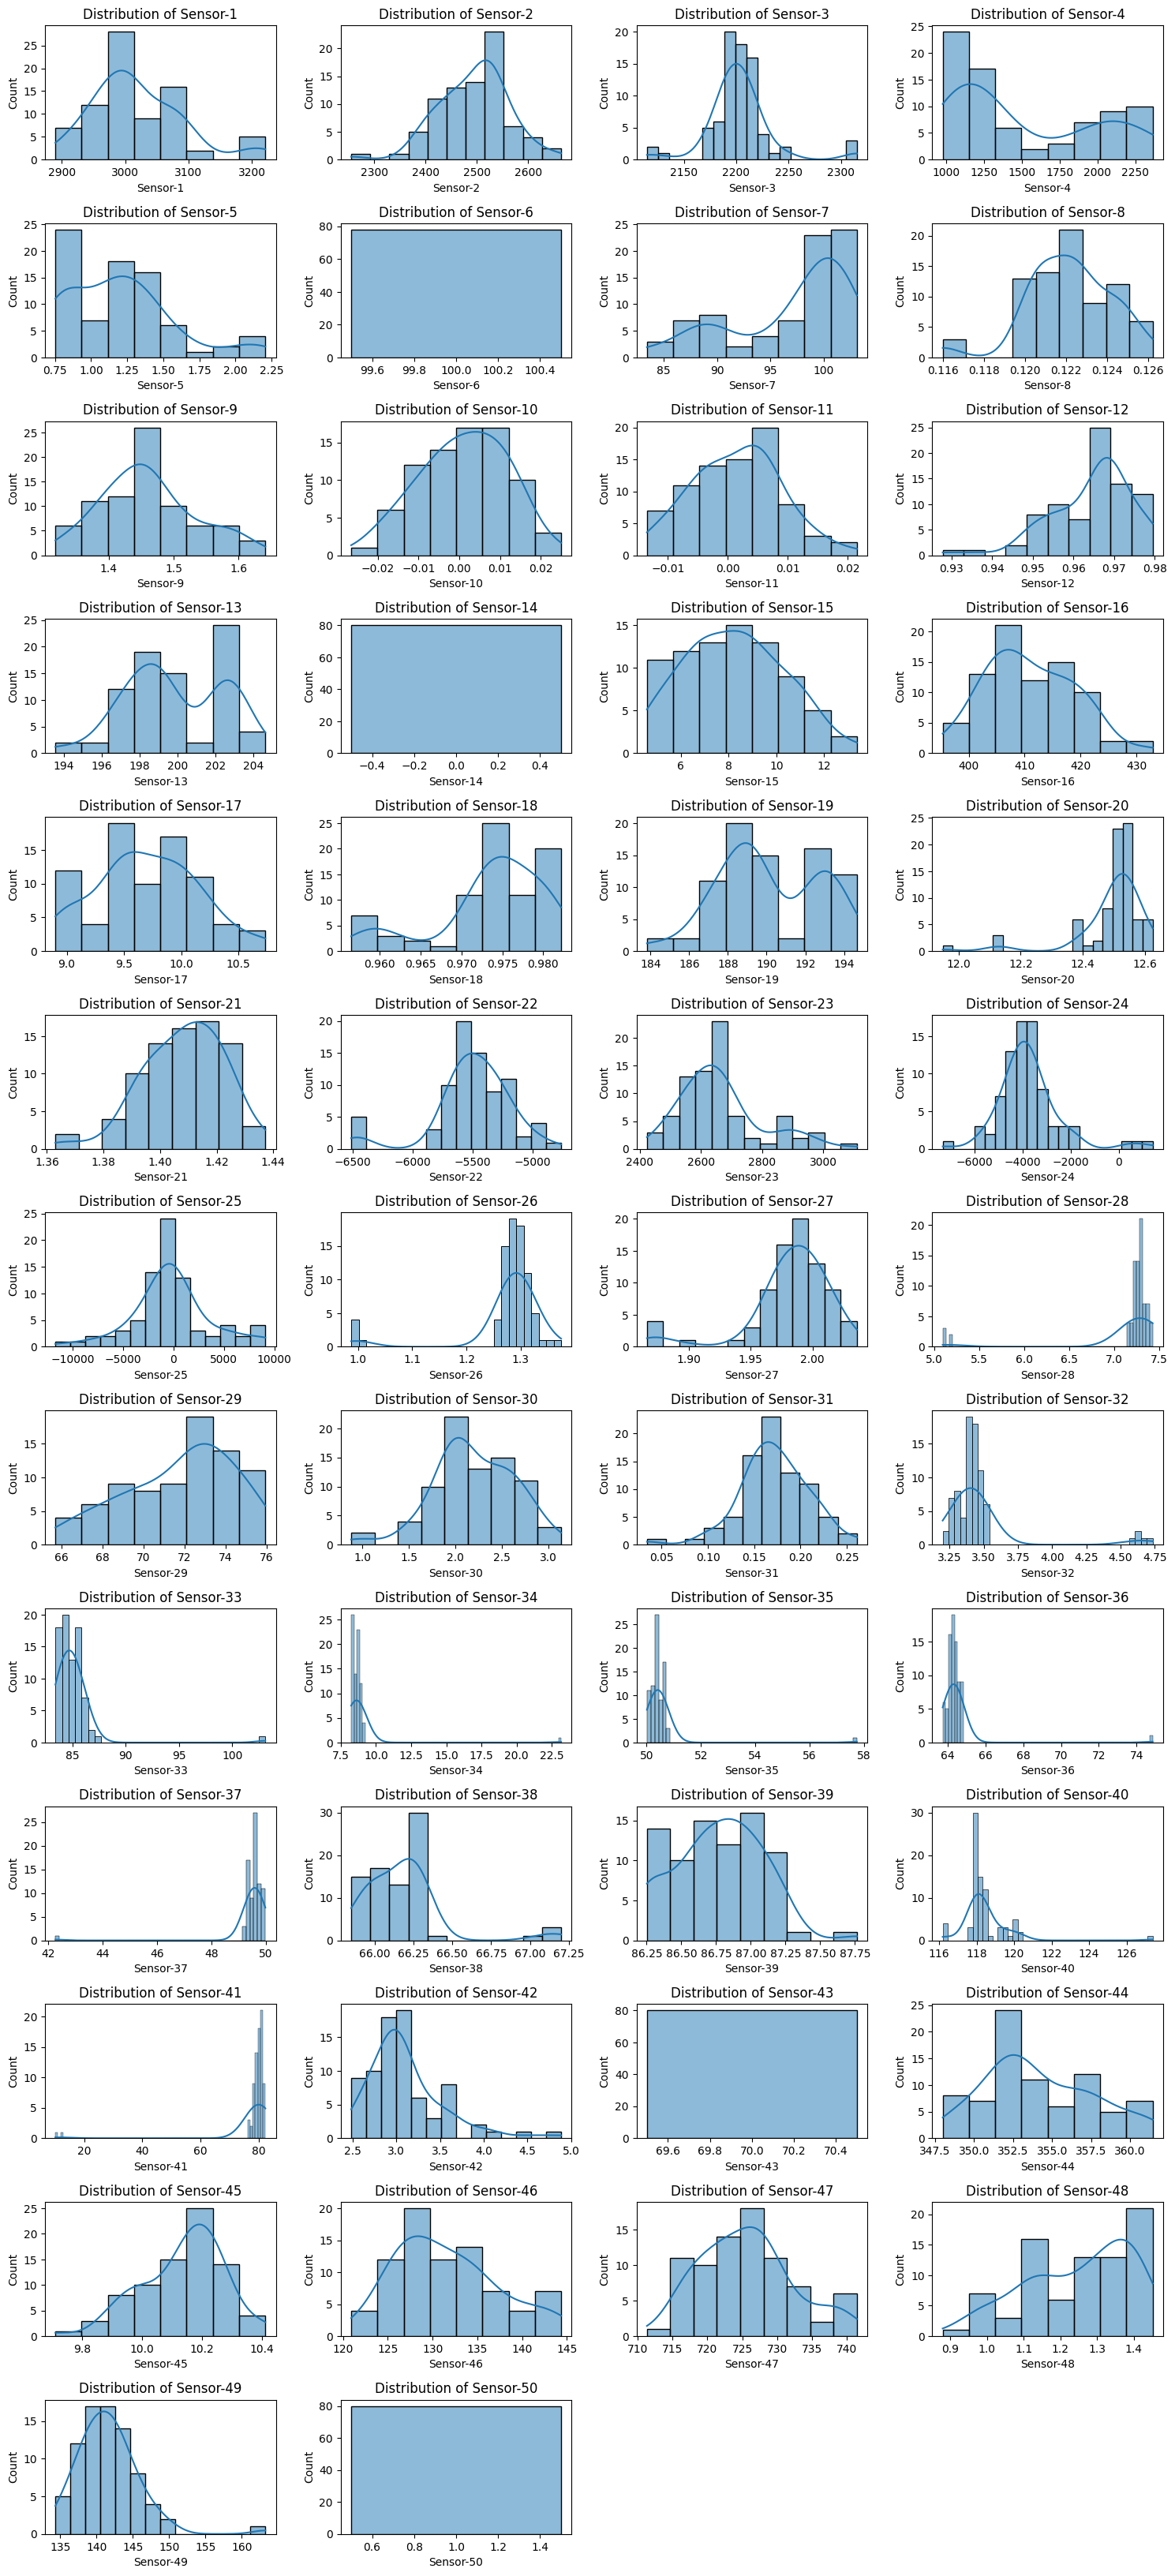

In [14]:
plt.figure(figsize=(15, 100))

for i, column in enumerate(wafers.columns[1:51]):
    plt.subplot(40, 4, i+1)
    sns.histplot(wafers[column], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {column}')
    plt.tight_layout()


In [15]:
# (Optional)let's have a look at the distribution first 50 sensors of Wafers

#plt.figure(figsize=(15, 100))

#for i, col in enumerate(wafers.columns[1:51]):
    #plt.subplot(60, 3, i+1)
    #sns.distplot(x=wafers[col], color='indianred')
    #plt.xlabel(col, weight='bold')
    #plt.tight_layout()

In [16]:
# Select 50 random sensors
random_50_sensors_idx = []
for i in range(1, 51):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

In [17]:

# Select 50 random sensors

# random_50_sensors_idx = []
# for i in range(50):
#     if i not in random_50_sensors_idx:
#         random_50_sensors_idx.append(np.random.randint(1, 591))

In [18]:
# let's now, have a look at the distribution of random 50 sensors

# plt.figure(figsize=(15, 100))

# for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
#     plt.subplot(60, 3, i+1)
#     sns.distplot(x=wafers[col], color='indianred')
#     plt.xlabel(col, weight='bold')
#     plt.tight_layout()

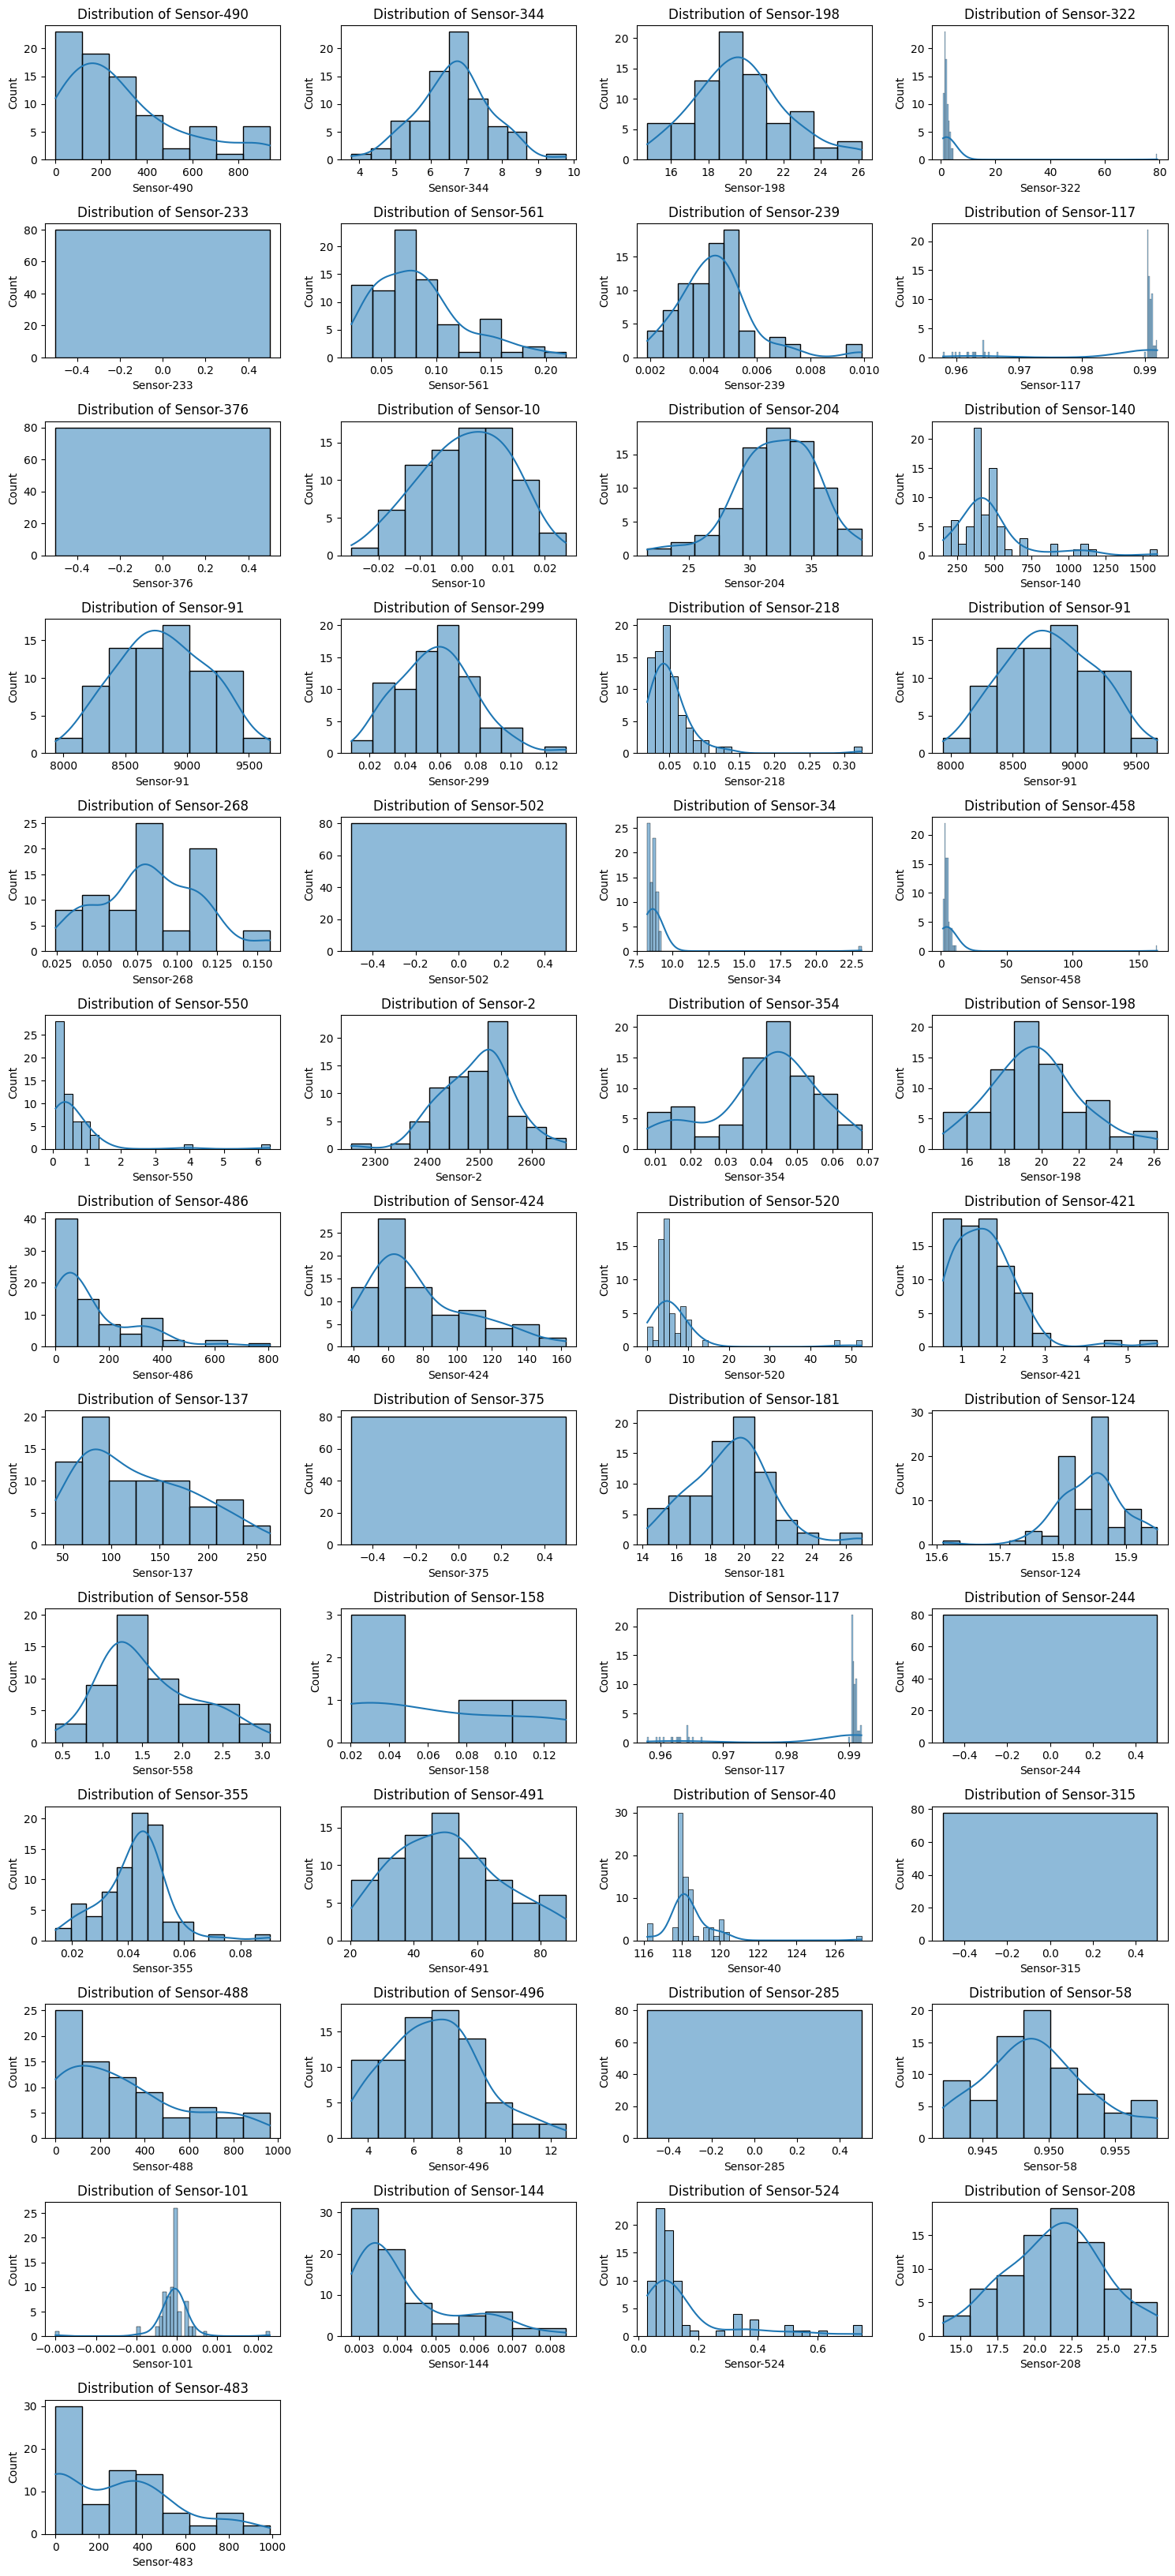

In [19]:
# let's now, have a look at the distribution of random 50 sensors
plt.figure(figsize=(15, 100))

for i, column in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(40, 4, i+1)
    sns.histplot(wafers[column], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling. 

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

1. If a column in a dataset has a standard deviation of zero, it means that all the values in that column are identical. In other words, there is no variation or spread in the data for that column—all the values are the same.

For example, if a column contains the values [5, 5, 5, 5, 5], the standard deviation would be zero because every value is exactly the same, resulting in no deviation from the mean.
So, will drop columns with zero standard deviation as they are not influencing the target variable in any way.

2. If columns having more then 70% missing data we will also drop this colum


In [20]:

# ## Columns w 0 Standard Deviation

def get_col_with_zero_std(df: pd.DataFrame):
    """
    Return list of columns who are having zero standard deviation
    """
    col_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    for col in num_cols:
        if df[col].std() == 0:
            col_to_drop.append(col)
    return col_to_drop

col_to_drop_1 = get_col_with_zero_std(df=wafers)
print(col_to_drop_1)
print(f"Total count of columns with zero std is : {len(col_to_drop_1)}")

['Sensor-6', 'Sensor-14', 'Sensor-43', 'Sensor-50', 'Sensor-53', 'Sensor-70', 'Sensor-75', 'Sensor-98', 'Sensor-142', 'Sensor-150', 'Sensor-179', 'Sensor-180', 'Sensor-187', 'Sensor-190', 'Sensor-191', 'Sensor-192', 'Sensor-193', 'Sensor-194', 'Sensor-195', 'Sensor-207', 'Sensor-210', 'Sensor-227', 'Sensor-230', 'Sensor-231', 'Sensor-232', 'Sensor-233', 'Sensor-234', 'Sensor-235', 'Sensor-236', 'Sensor-237', 'Sensor-238', 'Sensor-241', 'Sensor-242', 'Sensor-243', 'Sensor-244', 'Sensor-257', 'Sensor-258', 'Sensor-259', 'Sensor-260', 'Sensor-261', 'Sensor-262', 'Sensor-263', 'Sensor-264', 'Sensor-265', 'Sensor-266', 'Sensor-267', 'Sensor-277', 'Sensor-285', 'Sensor-314', 'Sensor-315', 'Sensor-316', 'Sensor-323', 'Sensor-326', 'Sensor-327', 'Sensor-328', 'Sensor-329', 'Sensor-330', 'Sensor-331', 'Sensor-343', 'Sensor-348', 'Sensor-365', 'Sensor-370', 'Sensor-371', 'Sensor-372', 'Sensor-373', 'Sensor-374', 'Sensor-375', 'Sensor-376', 'Sensor-379', 'Sensor-380', 'Sensor-381', 'Sensor-382', 

In [21]:
## Columns w missing vals more than 70%
def get_redundent_columns(df: pd.DataFrame, threshhold_value = 0.7):
    """
    Delete collumns whose missing value is morethen 70 %
    """
    col_missing_ratio = df.isna().sum().div(df.shape[0])
    col_to_drop = list(col_missing_ratio[col_missing_ratio > threshhold_value].index)

    return col_to_drop

col_to_drop_2 = get_redundent_columns(df=wafers, threshhold_value=0.7)
col_to_drop_2

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [22]:
## Cols to drop

cols_to_drop = col_to_drop_1 + col_to_drop_2
print(len(cols_to_drop))

126


**=>** Features that are not gonna contribute to ML algorithm in anyway, whatsoever.

## # Separate Features and Labels out:

In [23]:
# Drop columns thet are not required and saperate features and labels out

X, y = wafers.drop(cols_to_drop, axis=1), wafers[["Good/Bad"]]

In [24]:
## Dependent feature variables

print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (80, 466)


,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


**=>** Now, we have 466 contributing features.

In [25]:
X.shape, y.shape

((80, 466), (80, 1))

In [26]:
## Independent/Target Variables

print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (80, 1)


,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1


## # Data Transformation:

In [27]:
X.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [28]:
# We needs to delete Wafer colum as the colum is not required
X.drop(columns=['Wafer'], inplace=True)

In [29]:
# Creating pipeline for data preprocessing so according to pipelie firt work is to impute data then use roubust scaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(steps=[('Imputer', imputer), ('Scaler', RobustScaler())])
preprocessing_pipeline


Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [30]:
# Now transforming the data using pipeline
X_train = preprocessing_pipeline.fit_transform(X)
print(X_train.shape)
X_train

(80, 465)


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         0.75955556,  0.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.51612903,
        -0.52610857,  0.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.58064516,
        -0.08775867,  0.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.29032258,
         0.28421459,  0.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.16129032,
        -0.20782888,  0.        ]])

## # Shall we cluster "Wafers" instances?

Let's see whether clustering of data instances do us any good. 

In [31]:
# %pip install kneed

In [32]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

class ClusterDataInstances:
    def __init__(self, X: np.array, desc: str):
        self.X = X
        self.desc = desc

    def _get_ideal_number_of_cluster(self) -> int:
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            wcss = []
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")

            print("WCSS completed for all shortlisted clusters")

            print("Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            
            print(f"Ideal number of clusters to be formed: {knee_finder.knee}")
            
            return knee_finder.knee
        
        except Exception as e:
            print(e)
            raise e
    
    def create_cluster(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand should've been divided into
            via of course KMeans Clustering algorithm.
            Raises:
            e: Raises relevant exception should any kind of error pops up while dividing the given data instances into
            clusters.
            Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_cluster()
            print(f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(ideal_clusters, init="k-means++", random_state=42)
            kmeans.fit(self.X)
            y_means = kmeans.fit_predict(self.X)
            print(f"..said data instances divided into {ideal_clusters} clusters successfully!")
            """ 
            The np.c_[] in NumPy is a shorthand for concatenating arrays along the second axis (columns) to create a new array. 
            Its often used to combine arrays column-wise.
            """
            return kmeans, np.c_[self.X, y_means]

        except Exception as e:
            print(e)
            raise e


In [33]:
# Instantiate cluster
cluster_wafers = ClusterDataInstances(X=X_train, desc='Wafer features')


In [34]:
cluster, X_clus = cluster_wafers.create_cluster()

WCSS for n_clusters=1: 7157148.928067336
WCSS for n_clusters=2: 2060306.1634277871
WCSS for n_clusters=3: 1075227.4800905853
WCSS for n_clusters=4: 524755.6688687304
WCSS for n_clusters=5: 313453.1212190197
WCSS for n_clusters=6: 265261.5495002388
WCSS for n_clusters=7: 217123.21597691026
WCSS for n_clusters=8: 175600.2883444653
WCSS for n_clusters=9: 143028.9132551465
WCSS for n_clusters=10: 108703.08733901892
WCSS completed for all shortlisted clusters
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "Wafer features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


In [35]:
cluster

KMeans(n_clusters=3, random_state=42)

In [36]:
np.unique(X_clus[:, -1])

array([0., 1., 2.])

**=>** So the dataset was divided into 3 optimal clusters.

Let's have a look at their shapes..

In [37]:
wafers_clus = np.c_[X_clus, y]


In [38]:
### Cluster 1 date
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(17, 467)

In [39]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

# ## Cluster_1 data
# wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
# wafers_1.shape

**=>** Perhaps we were wrong about dividing the `Wafers` dataset into clusters, as we can see pretty much of all datapoints lie in the first cluster itself.

Let's take look at another clusters anyway..

In [40]:
## Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(62, 467)

**=>** Man, seriously?!

In [41]:
## Cluster_3 data

wafers_clus[wafers_clus[:, -2] == 2].shape

(1, 467)

**=>** Thus we mustn't divide the dataset into clusters. Not a good idea!

## # Resampling of Training Instances:

Resampling is imperative in this case as the target variable is highly imbalanced.

In [42]:
y.value_counts()

Good/Bad
-1          74
 1           6
Name: count, dtype: int64

In [43]:
#%pip install imbalanced-learn

In [44]:
from imblearn.combine import SMOTETomek
X, y = X_train[:, :-1], y
resampler = SMOTETomek(sampling_strategy='auto')
X_res, y_res = resampler.fit_resample(X, y)

In [45]:
y_res.value_counts()

Good/Bad
-1          74
 1          74
Name: count, dtype: int64

In [46]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (80, 465)
After resampling, Shape of training instances:  (148, 465)


In [47]:
y_res[y_res == 1].sum()

Good/Bad    74.0
dtype: float64

In [48]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {(y_res[y_res == -1]).sum()}, 1: {(y_res[y_res == 1]).sum()}")

[-1  1]
Value Counts: 
-1: Good/Bad   -74.0
dtype: float64, 1: Good/Bad    74.0
dtype: float64


**=>** Exactly what we wanted!

### # Prepare the Test set:

Do exactly the same to test set whatever's been done to the test set.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((98, 464), (98, 1))
test set: ((50, 464), (50, 1))


In [50]:
# # fetch only features that were used in training
# X_test, y_test = wafers_test[preprocessing_pipeline.feature_names_in_], wafers_test.iloc[:, -1]

# ## Transform the Test features
# X_test_trans = preprocessing_pipeline.transform(X_test)
# print(X_test_trans.shape, y_test.shape)

# ## Cluster the test features
# y_test_kmeans = clusterer.predict(X_test_trans)

# ## Configure the test array
# test_arr = np.c_[X_test_trans, y_test, y_test_kmeans]
# np.unique(y_test_kmeans)

In [51]:
# # Prepare the test features and test labels for cluster one

# X_test_prep, y_test_prep = test_arr[test_arr[:, -2] == ], test_arr[:, -1]
# print(X_test_prep.shape)

## # Model Selection and Training:

In [52]:
# %pip install xgboost==0.90

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [104]:

# Define parameter grids for each model

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt']
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Instantiate the models (optional)
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()
lr_model = LogisticRegression()


In [107]:
# Remap the labels in the training and test sets
y_train_mapped = np.where(y_train == -1, 0, y_train)
y_test_mapped = np.where(y_test == -1, 0, y_test)


In [105]:
# Define GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)

In [108]:
# Train models using GridSearchCV
grid_search_rf.fit(X_train, y_train_mapped)
grid_search_dt.fit(X_train, y_train_mapped)
grid_search_xgb.fit(X_train, y_train_mapped)
grid_search_lr.fit(X_train, y_train_mapped)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             verbose=2)

In [110]:
# Make predictions on the test set
y_pred_rf = grid_search_rf.predict(X_test)
y_pred_dt = grid_search_dt.predict(X_test)
y_pred_xgb = grid_search_xgb.predict(X_test)
y_pred_lr = grid_search_lr.predict(X_test)

In [111]:
# Evaluate and print results for each model
print("RandomForest Accuracy:", accuracy_score(y_test_mapped, y_pred_rf))
print("DecisionTree Accuracy:", accuracy_score(y_test_mapped, y_pred_dt))
print("XGB Accuracy:", accuracy_score(y_test_mapped, y_pred_xgb))
print("LogisticRegression Accuracy:", accuracy_score(y_test_mapped, y_pred_lr))

RandomForest Accuracy: 1.0
DecisionTree Accuracy: 0.96
XGB Accuracy: 1.0
LogisticRegression Accuracy: 0.98


In [112]:
# Print classification reports and confusion matrices
print("RandomForest Classification Report:\n", classification_report(y_test_mapped, y_pred_rf))
print("DecisionTree Classification Report:\n", classification_report(y_test_mapped, y_pred_dt))
print("XGB Classification Report:\n", classification_report(y_test_mapped, y_pred_xgb))
print("LogisticRegression Classification Report:\n", classification_report(y_test_mapped, y_pred_lr))

RandomForest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

DecisionTree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.93      1.00      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

XGB Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00   

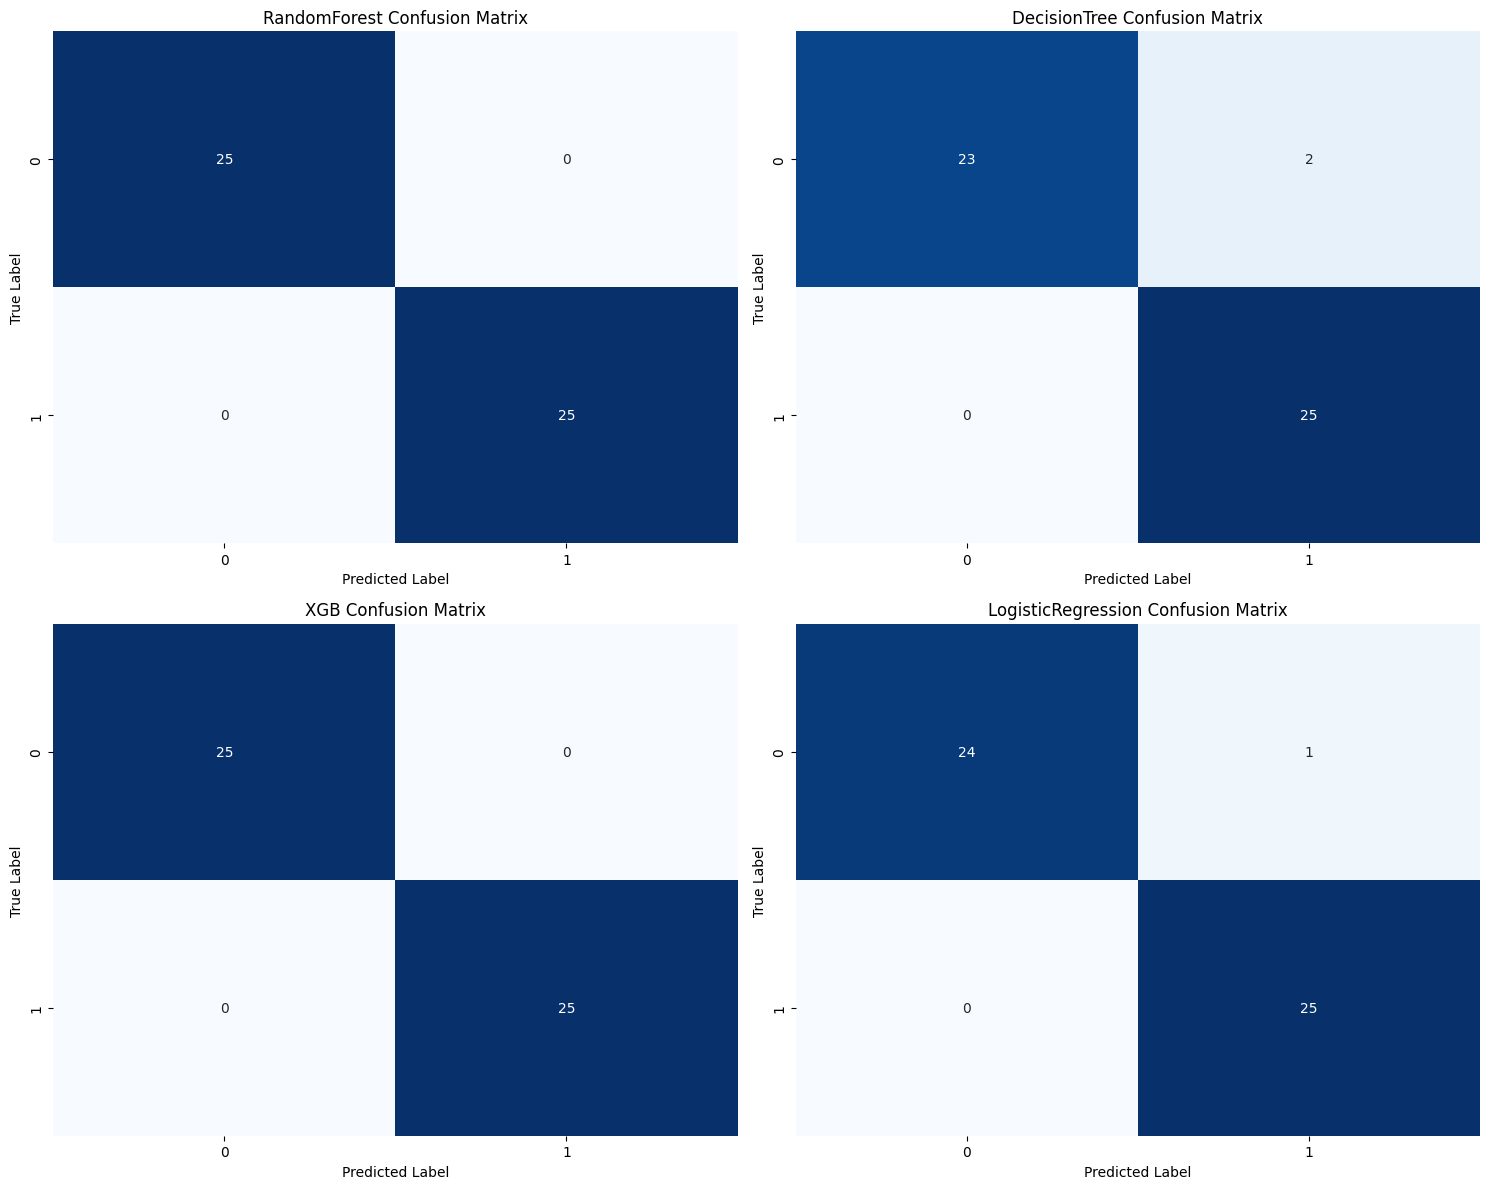

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
cm_rf = confusion_matrix(y_test_mapped, y_pred_rf)
cm_dt = confusion_matrix(y_test_mapped, y_pred_dt)
cm_xgb = confusion_matrix(y_test_mapped, y_pred_xgb)
cm_lr = confusion_matrix(y_test_mapped, y_pred_lr)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot the confusion matrix for RandomForest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('RandomForest Confusion Matrix')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')

# Plot the confusion matrix for DecisionTree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('DecisionTree Confusion Matrix')
axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')

# Plot the confusion matrix for XGB
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('XGB Confusion Matrix')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# Plot the confusion matrix for LogisticRegression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('LogisticRegression Confusion Matrix')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

